# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

count = 1

# set up lists to hold reponse info
lat = []
long = []
max_temp = []
city_name = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    print(json.dumps(response, indent = 4, sort_keys = True))
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        city_name.append(response['name'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing City: {city} {count}")
        count = count + 1
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.4529,
        "lon": -75.0638
    },
    "dt": 1613173438,
    "id": 5129852,
    "main": {
        "feels_like": 7.72,
        "humidity": 60,
        "pressure": 1028,
        "temp": 14.45,
        "temp_max": 17.01,
        "temp_min": 12
    },
    "name": "Oneonta",
    "sys": {
        "country": "US",
        "id": 2006902,
        "sunrise": 1613131248,
        "sunset": 1613168902,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 101,
        "gust": 1.01,
        "speed": 1.01
    }
}
Processing City: oneonta 1
------------
{
    "base": "stat

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 65.282,
        "lon": -126.8329
    },
    "dt": 1613173306,
    "id": 6089245,
    "main": {
        "feels_like": -12.06,
        "humidity": 71,
        "pressure": 1030,
        "temp": -2.2,
        "temp_max": -2.2,
        "temp_min": -2.2
    },
    "name": "Norman Wells",
    "sys": {
        "country": "CA",
        "id": 951,
        "sunrise": 1613147879,
        "sunset": 1613177120,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 5.75
    }
}
Processing City: norman wells 12
------------
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 42.6001,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.9258,
        "lon": 18.4232
    },
    "dt": 1613172970,
    "id": 3369157,
    "main": {
        "feels_like": 70.66,
        "humidity": 88,
        "pressure": 1008,
        "temp": 69.1,
        "temp_max": 70,
        "temp_min": 68
    },
    "name": "Cape Town",
    "sys": {
        "country": "ZA",
        "id": 1899,
        "sunrise": 1613189991,
        "sunset": 1613238084,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 6.91
    }
}
Processing City: cape town 22
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.81,
        "lon": 114.8794
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 77.484,
        "lon": -69.3632
    },
    "dt": 1613173278,
    "id": 3831208,
    "main": {
        "feels_like": -10.68,
        "grnd_level": 1010,
        "humidity": 70,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": -1.39,
        "temp_max": -1.39,
        "temp_min": -1.39
    },
    "name": "Qaanaaq",
    "sys": {
        "country": "GL",
        "sunrise": 0,
        "sunset": 0
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 42,
        "speed": 4.76
    }
}
Processing City: qaanaaq 33
------------
{
    "base": "stations",
    "clouds": {
        "all": 32
    },
    "cod": 200,
    "coord": {
        "lat": 71.9167,
        "lon": 114.0833
    }

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -22.9661,
        "lon": -42.0278
    },
    "dt": 1613173304,
    "id": 3471451,
    "main": {
        "feels_like": 74.71,
        "grnd_level": 1013,
        "humidity": 87,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 76.41,
        "temp_max": 76.41,
        "temp_min": 76.41
    },
    "name": "Arraial do Cabo",
    "rain": {
        "1h": 2.734
    },
    "sys": {
        "country": "BR",
        "sunrise": 1613118912,
        "sunset": 1613165380
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 34,
        "speed": 18.63
    }
}
Processing City: arraial do cabo 44
------------
{
    "base": "stations",
    "clouds": {
        "all": 19
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": -9.8,
        "lon": -139.0333
    },
    "dt": 1613173216,
    "id": 4020109,
    "main": {
        "feels_like": 78.73,
        "grnd_level": 1002,
        "humidity": 79,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 79.03,
        "temp_max": 79.03,
        "temp_min": 79.03
    },
    "name": "Atuona",
    "sys": {
        "country": "PF",
        "sunrise": 1613143049,
        "sunset": 1613187806
    },
    "timezone": -34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 102,
        "speed": 15.88
    }
}
Processing City: atuona 55
------------
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 63.7506,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "lat": -46.1927,
        "lon": 168.8643
    },
    "dt": 1613173226,
    "id": 6201424,
    "main": {
        "feels_like": 65.17,
        "humidity": 60,
        "pressure": 1014,
        "temp": 68,
        "temp_max": 68,
        "temp_min": 68
    },
    "name": "Mataura",
    "sys": {
        "country": "NZ",
        "id": 2008959,
        "sunrise": 1613152562,
        "sunset": 1613203302,
        "type": 3
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 213,
        "gust": 10,
        "speed": 7
    }
}
Processing City: mataura 66
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 45.4612,
        

{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 70.6333,
        "lon": 147.9167
    },
    "dt": 1613173290,
    "id": 2126123,
    "main": {
        "feels_like": -31.52,
        "grnd_level": 1032,
        "humidity": 71,
        "pressure": 1036,
        "sea_level": 1036,
        "temp": -22.76,
        "temp_max": -22.76,
        "temp_min": -22.76
    },
    "name": "Chokurdakh",
    "sys": {
        "country": "RU",
        "sunrise": 1613170804,
        "sunset": 1613195114
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 186,
        "speed": 3.15
    }
}
Processing City: chokurdakh 76
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stat

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 63.7256,
        "lon": 8.834
    },
    "dt": 1613173440,
    "id": 3139597,
    "main": {
        "feels_like": 12.22,
        "humidity": 64,
        "pressure": 1037,
        "temp": 32,
        "temp_max": 32,
        "temp_min": 32
    },
    "name": "Sistranda",
    "sys": {
        "country": "NO",
        "id": 1647,
        "sunrise": 1613201080,
        "sunset": 1613231597,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "snow",
            "icon": "13n",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 240,
        "speed": 26.46
    }
}
Processing City: sistranda 86
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -13.7,
        "lon": -76.2167
    },
    "dt": 16

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 26.1247,
        "lon": 127.6694
    },
    "dt": 1613173455,
    "id": 1861280,
    "main": {
        "feels_like": 63.95,
        "humidity": 88,
        "pressure": 1015,
        "temp": 65.71,
        "temp_max": 68,
        "temp_min": 64
    },
    "name": "Itoman",
    "sys": {
        "country": "JP",
        "id": 8137,
        "sunrise": 1613167600,
        "sunset": 1613208037,
        "type": 1
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 30,
        "speed": 10.36
    }
}
Processing City: itoman 96
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -4.7561,
        "lon": 11.8578
  

{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 41.3712,
        "lon": -73.414
    },
    "dt": 1613173203,
    "id": 5282297,
    "main": {
        "feels_like": 15.06,
        "humidity": 33,
        "pressure": 1026,
        "temp": 23.99,
        "temp_max": 24.8,
        "temp_min": 21.99
    },
    "name": "Bethel",
    "sys": {
        "country": "US",
        "id": 3888,
        "sunrise": 1613130742,
        "sunset": 1613168616,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 4.61
    }
}
Processing City: bethel 106
------------
{
    "base": "stations",
    "clouds": {


{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 1.55,
        "lon": 110.3333
    },
    "dt": 1613173394,
    "id": 1735634,
    "main": {
        "feels_like": 84.24,
        "humidity": 100,
        "pressure": 1011,
        "temp": 75.11,
        "temp_max": 75.2,
        "temp_min": 75
    },
    "name": "Kuching",
    "sys": {
        "country": "MY",
        "id": 9366,
        "sunrise": 1613170263,
        "sunset": 1613213695,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 2.3
    }
}
Processing City: kuching 115
------------
{
    "base": "stations",
    "clouds": {
        "al

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -11.7833,
        "lon": 19.9167
    },
    "dt": 1613173460,
    "id": 3347719,
    "main": {
        "feels_like": 58.98,
        "grnd_level": 865,
        "humidity": 80,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 60.67,
        "temp_max": 60.67,
        "temp_min": 60.67
    },
    "name": "Luena",
    "sys": {
        "country": "AO",
        "sunrise": 1613191191,
        "sunset": 1613236167
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 276,
        "speed": 5.46
    }
}
Processing City: luena 126
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 29.3627,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 50.6996,
        "lon": -127.4199
    },
    "dt": 1613173340,
    "id": 6111862,
    "main": {
        "feels_like": 11.7,
        "humidity": 47,
        "pressure": 1012,
        "temp": 32.7,
        "temp_max": 33.8,
        "temp_min": 32
    },
    "name": "Port Hardy",
    "snow": {
        "1h": 0.12
    },
    "sys": {
        "country": "CA",
        "id": 1011,
        "sunrise": 1613144798,
        "sunset": 1613180483,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 100,
        "speed": 27.63
    }
}
Processing City: port hardy 137
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 21.1167,
        "lon": 70.1167
    },
    "dt": 1613173464,
    "id": 1263752,
    "main": {
        "feels_like": 63.82,
        "grnd_level": 1010,
        "humidity": 51,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 68.25,
        "temp_max": 68.25,
        "temp_min": 68.25
    },
    "name": "M\u0101ngrol",
    "sys": {
        "country": "IN",
        "sunrise": 1613181073,
        "sunset": 1613222189
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 345,
        "speed": 7.72
    }
}
Processing City: mangrol 147
------------
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": -26.6481,
      

{
    "base": "stations",
    "clouds": {
        "all": 39
    },
    "cod": 200,
    "coord": {
        "lat": 71.6872,
        "lon": 128.8694
    },
    "dt": 1613173005,
    "id": 2015306,
    "main": {
        "feels_like": -18.96,
        "grnd_level": 1025,
        "humidity": 91,
        "pressure": 1030,
        "sea_level": 1030,
        "temp": -11.18,
        "temp_max": -11.18,
        "temp_min": -11.18
    },
    "name": "Tiksi",
    "sys": {
        "country": "RU",
        "sunrise": 1613176078,
        "sunset": 1613198983
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 339,
        "speed": 1.88
    }
}
Processing City: tiksi 157
------------
{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 51.0333,
 

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 55.7435,
        "lon": -97.8558
    },
    "dt": 1613173364,
    "id": 6165406,
    "main": {
        "feels_like": -24.84,
        "humidity": 63,
        "pressure": 1037,
        "temp": -16.6,
        "temp_max": -16.6,
        "temp_min": -16.6
    },
    "name": "Thompson",
    "sys": {
        "country": "CA",
        "id": 935,
        "sunrise": 1613138524,
        "sunset": 1613172566,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 2.3
    }
}
Processing City: thompson 167
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 11.6667,
        "lon": 92.75
   

{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "lat": 64.8945,
        "lon": -23.7142
    },
    "dt": 1613173365,
    "id": 3414079,
    "main": {
        "feels_like": 20.97,
        "grnd_level": 1010,
        "humidity": 73,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 39.6,
        "temp_max": 39.6,
        "temp_min": 39.6
    },
    "name": "Olafsvik",
    "rain": {
        "1h": 0.1006
    },
    "sys": {
        "country": "IS",
        "sunrise": 1613123054,
        "sunset": 1613152448
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 95,
        "speed": 26.64
    }
}
Processing City: olafsvik 177
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord"

{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": 4.8845,
        "lon": -1.7554
    },
    "dt": 1613173471,
    "id": 2294915,
    "main": {
        "feels_like": 87.28,
        "grnd_level": 1007,
        "humidity": 86,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 80.65,
        "temp_max": 80.65,
        "temp_min": 80.65
    },
    "name": "Takoradze",
    "sys": {
        "country": "GH",
        "sunrise": 1613110960,
        "sunset": 1613154002
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 234,
        "speed": 7.74
    }
}
Processing City: takoradi 187
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 64.8569,
        "lon

{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -15.8631,
        "lon": -38.8828
    },
    "dt": 1613173444,
    "id": 3470137,
    "main": {
        "feels_like": 80.94,
        "humidity": 73,
        "pressure": 1015,
        "temp": 78.8,
        "temp_max": 78.8,
        "temp_min": 78.8
    },
    "name": "Belmonte",
    "sys": {
        "country": "BR",
        "id": 8422,
        "sunrise": 1613118633,
        "sunset": 1613164150,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 80,
        "speed": 9.22
    }
}
Processing City: belmonte 197
------------
{
    "base": "stations",
    "clouds": {
  

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -25.2406,
        "lon": 130.9889
    },
    "dt": 1613173367,
    "id": 6355222,
    "main": {
        "feels_like": 54.45,
        "humidity": 82,
        "pressure": 1014,
        "temp": 62.6,
        "temp_max": 62.6,
        "temp_min": 62.6
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1613163645,
        "sunset": 1613210399,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 18.41
    }
}
Processing City: yulara 207
------------
{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": -2.9248,
        "lon": -39.91

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 66.7697,
        "lon": 123.3711
    },
    "dt": 1613173476,
    "id": 2012530,
    "main": {
        "feels_like": -21.21,
        "grnd_level": 1022,
        "humidity": 90,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": -9.11,
        "temp_max": -9.11,
        "temp_min": -9.11
    },
    "name": "Zhigansk",
    "sys": {
        "country": "RU",
        "sunrise": 1613174727,
        "sunset": 1613202973
    },
    "timezone": 32400,
    "visibility": 5905,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 347,
        "speed": 9.62
    }
}
Processing City: zhigansk 218
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 67.667,


{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -22.92,
        "lon": -42.5103
    },
    "dt": 1613173478,
    "id": 3448011,
    "main": {
        "feels_like": 86.72,
        "humidity": 89,
        "pressure": 1011,
        "temp": 78.8,
        "temp_max": 78.8,
        "temp_min": 78.8
    },
    "name": "Saquarema",
    "rain": {
        "1h": 2.73
    },
    "sys": {
        "country": "BR",
        "id": 8429,
        "sunrise": 1613119031,
        "sunset": 1613165493,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 4.61
    }
}
Processing City: saquarema 229
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 2.1006,
        "lon": 102.7994
    },
    "dt": 1613173480,
    "id": 1732871,
    "main": {
        "feels_like": 82.13,
        "humidity": 83,
        "pressure": 1012,
        "temp": 77,
        "temp_max": 77,
        "temp_min": 77
    },
    "name": "Singkang",
    "sys": {
        "country": "MY",
        "id": 9437,
        "sunrise": 1613172102,
        "sunset": 1613215472,
        "type": 1
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 50,
        "speed": 5.75
    }
}
Processing City: singkang 239
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -8.2686,
        "lon": -72.7439
    },


{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.8,
        "lon": -96.667
    },
    "dt": 1613173465,
    "id": 5072006,
    "main": {
        "feels_like": -13.14,
        "humidity": 65,
        "pressure": 1034,
        "temp": -0.67,
        "temp_max": 0,
        "temp_min": -0.99
    },
    "name": "Lincoln",
    "snow": {
        "1h": 0.14
    },
    "sys": {
        "country": "US",
        "id": 4736,
        "sunrise": 1613136261,
        "sunset": 1613174258,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13d",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 10.36
    }
}
Processing City: lincoln 250
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base"

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 48.6814,
        "lon": 71.6433
    },
    "dt": 1613173484,
    "id": 1526041,
    "main": {
        "feels_like": 9.5,
        "grnd_level": 968,
        "humidity": 95,
        "pressure": 1030,
        "sea_level": 1030,
        "temp": 18.28,
        "temp_max": 18.28,
        "temp_min": 18.28
    },
    "name": "Atas\u016b",
    "sys": {
        "country": "KZ",
        "sunrise": 1613183103,
        "sunset": 1613219426
    },
    "timezone": 21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77,
        "speed": 6.26
    }
}
Processing City: atasu 261
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 54.8377,
       

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -5.1989,
        "lon": -35.4608
    },
    "dt": 1613173486,
    "id": 3386213,
    "main": {
        "feels_like": 84.67,
        "humidity": 78,
        "pressure": 1011,
        "temp": 80.6,
        "temp_max": 80.6,
        "temp_min": 80.6
    },
    "name": "Touros",
    "sys": {
        "country": "BR",
        "id": 8452,
        "sunrise": 1613118462,
        "sunset": 1613162678,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 160,
        "speed": 9.22
    }
}
Processing City: touros 272
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 13.3258,
        "lon": -1.5347
    }

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 72.7868,
        "lon": -56.1549
    },
    "dt": 1613173283,
    "id": 3418910,
    "main": {
        "feels_like": -12.96,
        "grnd_level": 1006,
        "humidity": 80,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": -1.8,
        "temp_max": -1.8,
        "temp_min": -1.8
    },
    "name": "Upernavik",
    "sys": {
        "country": "GL",
        "sunrise": 1613135163,
        "sunset": 1613155910
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 17,
        "speed": 8.21
    }
}
Processing City: upernavik 282
------------
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 6,
        "lon":

{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 69.2167,
        "lon": -51.1
    },
    "dt": 1613173455,
    "id": 3423146,
    "main": {
        "feels_like": -6.36,
        "humidity": 85,
        "pressure": 1005,
        "temp": 3.2,
        "temp_max": 3.2,
        "temp_min": 3.2
    },
    "name": "Ilulissat",
    "sys": {
        "country": "GL",
        "id": 165,
        "sunrise": 1613131472,
        "sunset": 1613157175,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 5.75
    }
}
Processing City: ilulissat 292
------------
{
    "base": "stations",
    "clouds": {
        "a

}
Processing City: livadiya 301
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": -9.0122,
        "lon": -35.2225
    },
    "dt": 1613173256,
    "id": 3395458,
    "main": {
        "feels_like": 81.52,
        "grnd_level": 1012,
        "humidity": 79,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 79.2,
        "temp_max": 79.2,
        "temp_min": 79.2
    },
    "name": "Maragogi",
    "sys": {
        "country": "BR",
        "sunrise": 1613118178,
        "sunset": 1613162848
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 114,
        "speed": 11.36
    }
}
Processing City: maragogi 302
------------
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
   

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 47.4334,
        "lon": -72.7824
    },
    "dt": 1613173410,
    "id": 6050416,
    "main": {
        "feels_like": -2.04,
        "humidity": 78,
        "pressure": 1027,
        "temp": 6.8,
        "temp_max": 6.8,
        "temp_min": 6.8
    },
    "name": "La Tuque",
    "sys": {
        "country": "CA",
        "id": 208,
        "sunrise": 1613131266,
        "sunset": 1613167788,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 2425,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 4.61
    }
}
Processing City: la tuque 313
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 10.6333,
        "lon": -4.7667


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 5.6,
        "lon": 14.0833
    },
    "dt": 1613173495,
    "id": 2234339,
    "main": {
        "feels_like": 61.36,
        "grnd_level": 925,
        "humidity": 26,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 67.17,
        "temp_max": 67.17,
        "temp_min": 67.17
    },
    "name": "B\u00e9tar\u00e9 Oya",
    "sys": {
        "country": "CM",
        "sunrise": 1613193592,
        "sunset": 1613236566
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 17,
        "speed": 3.76
    }
}
Processing City: betare oya 323
------------
{
    "base": "stations",
    "clouds": {
        "all": 87
    },
    "cod": 200,
    "coord": {
        "lat": 58.3631,
  

{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": -19.9842,
        "lon": 57.6142
    },
    "dt": 1613173497,
    "id": 934649,
    "main": {
        "feels_like": 77.9,
        "humidity": 82,
        "pressure": 1012,
        "temp": 73.99,
        "temp_max": 73.99,
        "temp_min": 73.99
    },
    "name": "Cap Malheureux",
    "rain": {
        "1h": 0.16
    },
    "sys": {
        "country": "MU",
        "id": 2002134,
        "sunrise": 1613181625,
        "sunset": 1613227638,
        "type": 3
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 148,
        "gust": 8.01,
        "speed": 5.01
    }
}
Processing City: cap malheureux 333
------------
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": 18.8486,
        "lon": 76.5297
    },
    "dt": 1613173499,
    "id": 1260290,
    "main": {
        "feels_like": 60.39,
        "grnd_level": 959,
        "humidity": 44,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 66.07,
        "temp_max": 66.07,
        "temp_min": 66.07
    },
    "name": "Parli",
    "sys": {
        "country": "IN",
        "sunrise": 1613179391,
        "sunset": 1613220793
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 7.43
    }
}
Processing City: parli 344
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 1,
        "lon": -52
  

}
Processing City: los llanos de aridane 353
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 21.3906,
        "lon": -158.1547
    },
    "dt": 1613173501,
    "id": 5851349,
    "main": {
        "feels_like": 77.77,
        "humidity": 53,
        "pressure": 1017,
        "temp": 77.95,
        "temp_max": 78.8,
        "temp_min": 77
    },
    "name": "N\u0101n\u0101kuli",
    "sys": {
        "country": "US",
        "id": 7868,
        "sunrise": 1613149488,
        "sunset": 1613190545,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 5.75
    }
}
Processing City: nanakuli 354
------------
{
    "base": "stations",
    "clouds": {
        "all": 62
    },
    "cod": 20

{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 32.9408,
        "lon": 117.3608
    },
    "dt": 1613173508,
    "id": 1816440,
    "main": {
        "feels_like": 42.35,
        "grnd_level": 1019,
        "humidity": 92,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 47.59,
        "temp_max": 47.59,
        "temp_min": 47.59
    },
    "name": "Bengbu",
    "sys": {
        "country": "CN",
        "sunrise": 1613170576,
        "sunset": 1613210009
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 115,
        "speed": 7.38
    }
}
Processing City: bengbu 364
------------
{
    "cod": "404",
    "message"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 22.3,
        "lon": 73.2
    },
    "dt": 1613173513,
    "id": 1253573,
    "main": {
        "feels_like": 62.04,
        "grnd_level": 1007,
        "humidity": 25,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 68.43,
        "temp_max": 68.43,
        "temp_min": 68.43
    },
    "name": "Vadodara",
    "sys": {
        "country": "IN",
        "sunrise": 1613180410,
        "sunset": 1613221372
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 359,
        "speed": 4.79
    }
}
Processing City: vadodara 375
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 63.8986,
        "lon":

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 40.8021,
        "lon": -124.1637
    },
    "dt": 1613173428,
    "id": 5563397,
    "main": {
        "feels_like": 48.83,
        "humidity": 96,
        "pressure": 1017,
        "temp": 51.48,
        "temp_max": 52,
        "temp_min": 51.01
    },
    "name": "Eureka",
    "rain": {
        "1h": 0.26
    },
    "sys": {
        "country": "US",
        "id": 2019045,
        "sunrise": 1613142854,
        "sunset": 1613180863,
        "type": 3
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 209,
        "gust": 11.01,
        "speed": 5.01
    }
}
Processing City: eureka 386
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,


{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 60.5544,
        "lon": -151.2583
    },
    "dt": 1613173519,
    "id": 5866063,
    "main": {
        "feels_like": 15.67,
        "humidity": 59,
        "pressure": 1019,
        "temp": 28.78,
        "temp_max": 32,
        "temp_min": 26.6
    },
    "name": "Kenai",
    "sys": {
        "country": "US",
        "id": 7680,
        "sunrise": 1613152335,
        "sunset": 1613184387,
        "type": 1
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 40,
        "speed": 13.8
    }
}
Processing City: kenai 396
------------
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 14.1079,
        "lon": 121.1414
    },
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 60.0973,
        "lon": 19.9348
    },
    "dt": 1613173523,
    "id": 3041732,
    "main": {
        "feels_like": 17.73,
        "humidity": 74,
        "pressure": 1032,
        "temp": 30.2,
        "temp_max": 30.2,
        "temp_min": 30.2
    },
    "name": "Mariehamn",
    "sys": {
        "country": "AX",
        "id": 1347,
        "sunrise": 1613197454,
        "sunset": 1613229895,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 13.8
    }
}
Processing City: maarianhamina 406
------------
{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": -7.7136,
        "lon": -66.9764

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -29.9533,
        "lon": -71.3436
    },
    "dt": 1613173329,
    "id": 3893629,
    "main": {
        "feels_like": 62.55,
        "humidity": 72,
        "pressure": 1013,
        "temp": 66.2,
        "temp_max": 66.2,
        "temp_min": 66.2
    },
    "name": "Coquimbo",
    "sys": {
        "country": "CL",
        "id": 8514,
        "sunrise": 1613125426,
        "sunset": 1613172938,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 290,
        "speed": 10.36
    }
}
Processing City: coquimbo 417
------------
{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -20.0167,
        "lon": 148.2

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 33.816,
        "lon": -78.68
    },
    "dt": 1613173529,
    "id": 4589446,
    "main": {
        "feels_like": 34.95,
        "humidity": 87,
        "pressure": 1019,
        "temp": 42.01,
        "temp_max": 43,
        "temp_min": 41
    },
    "name": "North Myrtle Beach",
    "rain": {
        "1h": 0.24
    },
    "sys": {
        "country": "US",
        "id": 3701,
        "sunrise": 1613131322,
        "sunset": 1613170563,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 9656,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        },
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 8.05
    }
}
Processing City

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 60.445,
        "lon": 50.9968
    },
    "dt": 1613173532,
    "id": 543396,
    "main": {
        "feels_like": -15.48,
        "grnd_level": 1004,
        "humidity": 91,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": -5.67,
        "temp_max": -5.67,
        "temp_min": -5.67
    },
    "name": "Koygorodok",
    "sys": {
        "country": "RU",
        "sunrise": 1613190096,
        "sunset": 1613222344
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 16,
        "speed": 5.75
    }
}
Processing City: koygorodok 437
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 26.9167,

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -18.65,
        "lon": -173.9833
    },
    "dt": 1613173535,
    "id": 4032420,
    "main": {
        "feels_like": 88.77,
        "humidity": 78,
        "pressure": 1012,
        "temp": 82.4,
        "temp_max": 82.4,
        "temp_min": 82.4
    },
    "name": "Neiafu",
    "sys": {
        "country": "TO",
        "id": 7292,
        "sunrise": 1613237314,
        "sunset": 1613283114,
        "type": 1
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 90,
        "speed": 6.91
    }
}
Processing City: neiafu 447
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 25.2867,
        "lon": 51.5333
    

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 29.0605,
        "lon": -13.564
    },
    "dt": 1613173538,
    "id": 2510573,
    "main": {
        "feels_like": 57.54,
        "humidity": 77,
        "pressure": 1023,
        "temp": 64.4,
        "temp_max": 64.4,
        "temp_min": 64.4
    },
    "name": "Teguise",
    "sys": {
        "country": "ES",
        "id": 2379,
        "sunrise": 1613115334,
        "sunset": 1613155296,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 20,
        "speed": 16.11
    }
}
Processing City: teguise 458
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------
{
    "base": "stations",
    "clouds": {
        "a

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 42.0751,
        "lon": -72.0334
    },
    "dt": 1613173541,
    "id": 4951594,
    "main": {
        "feels_like": 15.28,
        "humidity": 26,
        "pressure": 1025,
        "temp": 22.5,
        "temp_max": 24.01,
        "temp_min": 21
    },
    "name": "Southbridge",
    "sys": {
        "country": "US",
        "id": 2033035,
        "sunrise": 1613130482,
        "sunset": 1613168213,
        "type": 3
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 233,
        "speed": 1.16
    }
}
Processing City: southbridge 468
------------
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 34.1667,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -33.963,
        "lon": 22.4617
    },
    "dt": 1613173545,
    "id": 1002145,
    "main": {
        "feels_like": 73.44,
        "humidity": 100,
        "pressure": 1010,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "George",
    "rain": {
        "1h": 0.22
    },
    "sys": {
        "country": "ZA",
        "id": 1918,
        "sunrise": 1613189018,
        "sunset": 1613237119,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 6.91
    }
}
Processing City: george 478
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 32.8333,
        "lon": 66
    },
    "dt": 1613173549,
    "id": 1131461,
    "main": {
        "feels_like": 38.17,
        "grnd_level": 828,
        "humidity": 50,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 43.72,
        "temp_max": 43.72,
        "temp_min": 43.72
    },
    "name": "Oruzgan",
    "sys": {
        "country": "AF",
        "sunrise": 1613182886,
        "sunset": 1613222352
    },
    "timezone": 16200,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 46,
        "speed": 2.15
    }
}
Processing City: uruzgan 488
------------
{
    "base": "stations",
    "clouds": {
        "all": 65
    },
    "cod": 200,
    "coord": {
        "lat": 21.2,
        "lon

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -33.2926,
        "lon": 23.4895
    },
    "dt": 1613173552,
    "id": 939676,
    "main": {
        "feels_like": 75.45,
        "grnd_level": 917,
        "humidity": 68,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 73.42,
        "temp_max": 73.42,
        "temp_min": 73.42
    },
    "name": "Willowmore",
    "sys": {
        "country": "ZA",
        "sunrise": 1613188828,
        "sunset": 1613236814
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 113,
        "speed": 3.71
    }
}
Processing City: willowmore 498
------------
{
    "base": "stations",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 5.0267,


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 54.4815,
        "lon": 53.471
    },
    "dt": 1613173555,
    "id": 515879,
    "main": {
        "feels_like": 23.94,
        "grnd_level": 1000,
        "humidity": 91,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 34.03,
        "temp_max": 34.03,
        "temp_min": 34.03
    },
    "name": "Oktyabr'skiy",
    "sys": {
        "country": "RU",
        "sunrise": 1613188309,
        "sunset": 1613222943
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 193,
        "speed": 11.5
    }
}
Processing City: oktyabrskiy 508
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 43.3

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": -5.8092,
        "lon": -61.3003
    },
    "dt": 1613173559,
    "id": 3663503,
    "main": {
        "feels_like": 86.05,
        "grnd_level": 1002,
        "humidity": 94,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 76.32,
        "temp_max": 76.32,
        "temp_min": 76.32
    },
    "name": "Manicor\u00e9",
    "rain": {
        "1h": 0.115
    },
    "sys": {
        "country": "BR",
        "sunrise": 1613124628,
        "sunset": 1613168915
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 134,
        "speed": 0.54
    }
}
Processing City: manicore 518
------------
{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 11.1,
        "lon": -2.1
    },
    "dt": 1613173562,
    "id": 2358382,
    "main": {
        "feels_like": 69.62,
        "grnd_level": 969,
        "humidity": 16,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 77.72,
        "temp_max": 77.72,
        "temp_min": 77.72
    },
    "name": "L\u00e9o",
    "sys": {
        "country": "BF",
        "sunrise": 1613111408,
        "sunset": 1613153719
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 38,
        "speed": 7.07
    }
}
Processing City: leo 528
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 23.45,
        "lon": -110.2167
    

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": -7.9589,
        "lon": -79.2392
    },
    "dt": 1613173566,
    "id": 3692073,
    "main": {
        "feels_like": 73.54,
        "humidity": 83,
        "pressure": 1009,
        "temp": 73.4,
        "temp_max": 73.4,
        "temp_min": 73.4
    },
    "name": "Santiago de Cao",
    "sys": {
        "country": "PE",
        "id": 8690,
        "sunrise": 1613128806,
        "sunset": 1613173347,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 9000,
    "weather": [
        {
            "description": "fog",
            "icon": "50n",
            "id": 741,
            "main": "Fog"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 11.5
    }
}
Processing City: santiago de cao 539
------------
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 18.3851,
        "lon": 42.450

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 43.2,
        "lon": 51.65
    },
    "dt": 1613173411,
    "id": 609919,
    "main": {
        "feels_like": 32.32,
        "grnd_level": 1013,
        "humidity": 69,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 49.1,
        "temp_max": 49.1,
        "temp_min": 49.1
    },
    "name": "Quryq",
    "sys": {
        "country": "KZ",
        "sunrise": 1613187262,
        "sunset": 1613224864
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 136,
        "speed": 25.64
    }
}
Processing City: kuryk 549
------------
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -2.9701,
        "lon": 119.897

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 18.0858,
        "lon": -15.9785
    },
    "dt": 1613173413,
    "id": 2377450,
    "main": {
        "feels_like": 58.05,
        "humidity": 13,
        "pressure": 1013,
        "temp": 69.8,
        "temp_max": 69.8,
        "temp_min": 69.8
    },
    "name": "Nouakchott",
    "sys": {
        "country": "MR",
        "id": 2482,
        "sunrise": 1613115166,
        "sunset": 1613156622,
        "type": 1
    },
    "timezone": 0,
    "visibility": 6000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 11.5
    }
}
Processing City: nouakchott 559
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -23.7,
        "lon": 133.8833
    },


{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 66.1451,
        "lon": -65.7125
    },
    "dt": 1613173378,
    "id": 6096551,
    "main": {
        "feels_like": -15.2,
        "humidity": 77,
        "pressure": 1009,
        "temp": -7.6,
        "temp_max": -7.6,
        "temp_min": -7.6
    },
    "name": "Pangnirtung",
    "sys": {
        "country": "CA",
        "id": 968,
        "sunrise": 1613133567,
        "sunset": 1613162094,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 135,
        "speed": 1.54
    }
}
Processing City: pangnirtung 569
------------
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 53.9166,
        "lon": -122

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 50.1186,
        "lon": -5.5371
    },
    "dt": 1613173574,
    "id": 2640377,
    "main": {
        "feels_like": 19.26,
        "humidity": 75,
        "pressure": 1023,
        "temp": 39.06,
        "temp_max": 39.2,
        "temp_min": 39
    },
    "name": "Penzance",
    "sys": {
        "country": "GB",
        "id": 1393,
        "sunrise": 1613115500,
        "sunset": 1613151277,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 28.77
    }
}
Processing City: penzance 580
------------
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 36.8529,
        "lon": -75.978
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 12.2175,
        "lon": 4.3792
    },
    "dt": 1613173461,
    "id": 2336237,
    "main": {
        "feels_like": 65.21,
        "grnd_level": 985,
        "humidity": 17,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 75.04,
        "temp_max": 75.04,
        "temp_min": 75.04
    },
    "name": "Jega",
    "sys": {
        "country": "NG",
        "sunrise": 1613196302,
        "sunset": 1613238514
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 61,
        "speed": 9.98
    }
}
Processing City: jega 591
------------
{
    "cod": "404",
    "message": "city not found"
}
Missing field/result... skipping.
------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = {'City': city_name, 'Latitude': lat,
               'Longitude': long, 'Max Temperature': max_temp, 
               'Humidity': humidity, 'Cloudiness': cloudiness, 
               'Wind Speed': wind_speed, 'Country': country, 
               'Date': date}

weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oneonta,42.4529,-75.0638,14.45,60,90,1.01,US,1613173438
1,Boldumsaz,42.1282,59.6710,31.08,80,0,6.91,TM,1613173389
2,Nikolskoye,59.7035,30.7861,-0.89,77,75,2.24,RU,1613173439
3,Hobart,-42.8794,147.3294,64.47,48,40,8.05,AU,1613173076
4,São João da Barra,-21.6403,-41.0511,77.68,82,100,15.37,BR,1613173439


In [5]:
# Export as CSV
weather_data_df.to_csv(r'output\cities.csv')

In [6]:
weather_data_df[["Latitude", "Longitude", "Max Temperature", "Humidity", 
                "Cloudiness", "Wind Speed", "Date"]].describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,20.954779,19.674764,48.043469,73.573604,51.351946,8.211844,1.613173e+09
std,33.069956,90.013920,31.647696,19.225008,39.732598,6.573879,1.256153e+02
min,-54.800000,-179.166700,-35.030000,1.000000,0.000000,0.110000,1.613173e+09
25%,-6.629200,-56.856200,28.150000,65.000000,6.500000,3.825000,1.613173e+09
50%,25.519800,22.461700,59.650000,78.000000,45.000000,6.440000,1.613173e+09
75%,49.038800,99.132850,74.855000,87.000000,90.000000,10.995000,1.613174e+09
max,78.218600,179.316700,88.340000,100.000000,100.000000,50.110000,1.613174e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

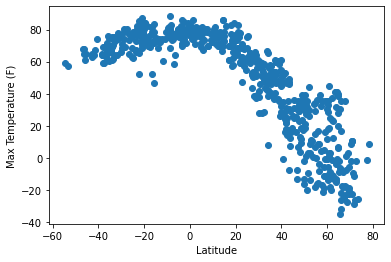

In [9]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

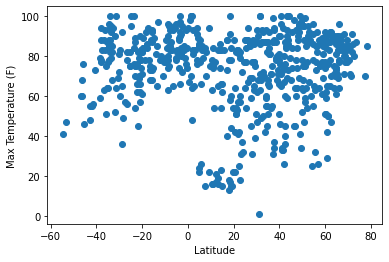

In [10]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Cloudiness Plot

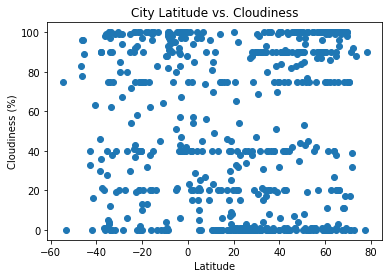

In [11]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

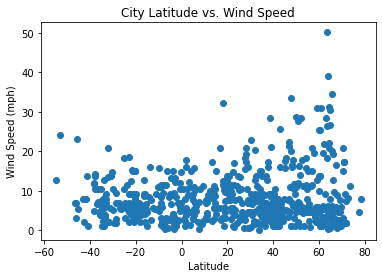

In [12]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [13]:
north_hem_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0, :]
north_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oneonta,42.4529,-75.0638,14.45,60,90,1.01,US,1613173438
1,Boldumsaz,42.1282,59.6710,31.08,80,0,6.91,TM,1613173389
2,Nikolskoye,59.7035,30.7861,-0.89,77,75,2.24,RU,1613173439
5,Ossora,59.2353,163.0719,-0.51,81,0,12.62,RU,1613173439
7,Poronaysk,49.2167,143.1167,17.33,97,84,3.00,RU,1613173440


In [14]:
south_hem_df = weather_data_df.loc[weather_data_df["Latitude"] < 0, :]
south_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
3,Hobart,-42.8794,147.3294,64.47,48,40,8.05,AU,1613173076
4,São João da Barra,-21.6403,-41.0511,77.68,82,100,15.37,BR,1613173439
6,Mahébourg,-20.4081,57.7000,77.00,83,40,14.97,MU,1613173262
18,Puerto Ayora,-0.7393,-90.3518,77.00,93,42,5.01,EC,1613173257
19,Poindimié,-20.9333,165.3333,81.82,66,0,5.01,NC,1613173442


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.774729211753949


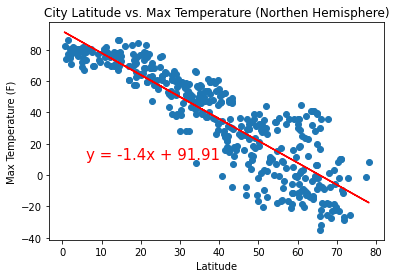

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Max Temperature"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_1 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Max Temperature"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_1, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (Northen Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2560138740087903


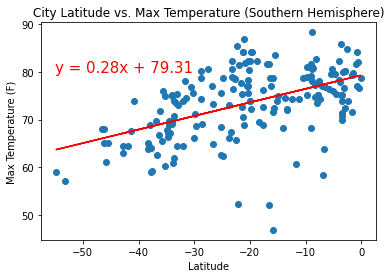

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Max Temperature"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Max Temperature"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_2, (-55,80), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.057929269757454716


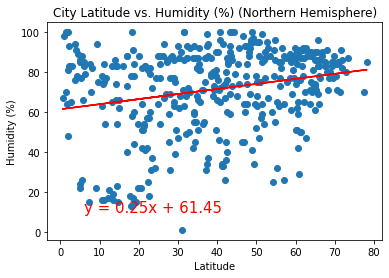

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Humidity"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Humidity"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_3, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14012421790540772


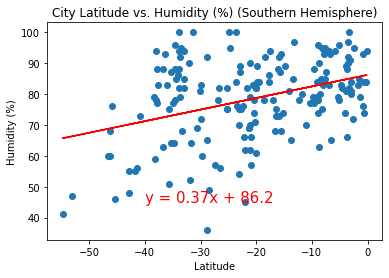

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Humidity"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_4 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Humidity"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_4, (-40,45), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05463349816997029


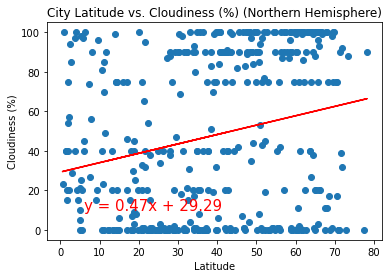

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Cloudiness"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_5 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Cloudiness"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_5, (6,10), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03589051442438661


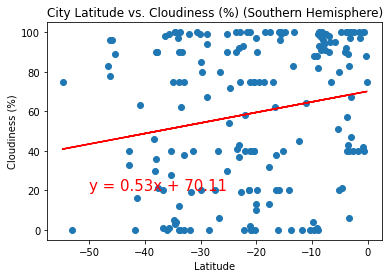

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Cloudiness"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Cloudiness"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_6, (-50,20), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017018214261747502


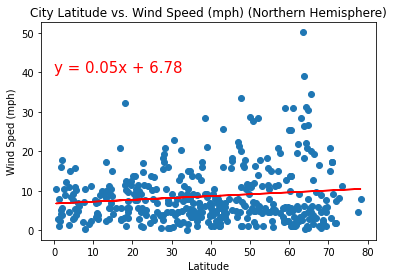

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem_df["Latitude"], north_hem_df["Wind Speed"])
regress_values = north_hem_df["Latitude"] * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem_df["Latitude"], north_hem_df["Wind Speed"])
plt.plot(north_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_6, (0,40), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Sped (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03666998353700754


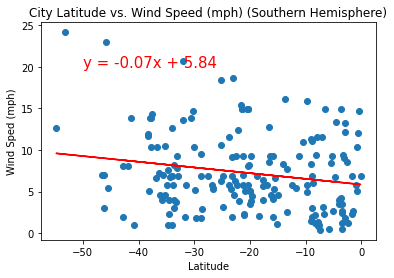

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem_df["Latitude"], south_hem_df["Wind Speed"])
regress_values = south_hem_df["Latitude"] * slope + intercept
line_eq_6 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem_df["Latitude"], south_hem_df["Wind Speed"])
plt.plot(south_hem_df["Latitude"], regress_values, "r-")

plt.annotate(line_eq_6, (-50,20), fontsize=15, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Sped (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")
plt.show()